<a href="https://colab.research.google.com/github/RonnyGuevara/Fractal_Images/blob/main/TP6/TP6_FI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from math import sin, cos, pi
import matplotlib.pyplot as plt
from matplotlib import collections
import warnings
warnings.filterwarnings('ignore')

class L_System(object):
    def __init__(self, rule):
        info = rule['S']
        for i in range(rule['iter']):
            ninfo = []
            for c in info:
                if c in rule:
                    ninfo.append(rule[c])
                else:
                    ninfo.append(c)
            info = "".join(ninfo)
        self.rule = rule
        self.info = info
 
    def get_lines(self):
        d = self.rule['direct']
        a = self.rule['angle']
        p = (0.0, 0.0)
        l = 1.0
        lines = []
        stack = []
        for c in self.info:
            if c in "Ff":
                r = d * pi / 180
                t = p[0] + l*cos(r), p[1] + l*sin(r)
                lines.append(((p[0], p[1]), (t[0], t[1])))
                p = t
            elif c == "+":
                d += a
            elif c == "-":
                d -= a
            elif c == "[":
                stack.append((p,d))
            elif c == "]":
                p, d = stack[-1]
                del stack[-1]
        return lines
 
 
def draw(ax, rule, iter=None):
    if iter!=None:
        rule["iter"] = iter
    lines = L_System(rule).get_lines()
    linecollections = collections.LineCollection(lines)
    ax.add_collection(linecollections, autolim=True)
    ax.axis("equal")
    ax.set_axis_off()
    ax.set_xlim(ax.dataLim.xmin, ax.dataLim.xmax)
    ax.invert_yaxis()

In [2]:
def draw_L(num):
  fig = plt.figure(figsize=(12,7))
  plt.title(Option, fontsize = 15)
  ax = fig.add_subplot(111)
  draw(ax, rules[num])
  plt.show()


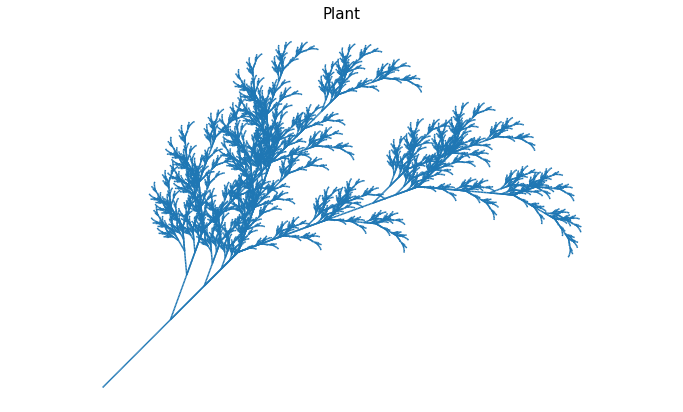

In [4]:
from google.colab import widgets
#@title Seleccione la gráfica { run: "auto" }
Option = 'Plant' #@param ["Koch","Dragon","Triangle","Plant","Hilbert","Sierpinski"]
iterations = 7 #@param {type:"slider", min:1, max:12, step:1}
rules = [
    {
        "F":"F-F++F-F", "S":"F",
        "direct":180,
        "angle":60,
        "iter":iterations,
        "title":"Koch"
    },
    {
        "X":"X+YF+", "Y":"-FX-Y", "S":"FX",
        "direct":0,
        "angle":90,
        "iter":iterations,
        "title":"Dragon"
    },
    {
        "f":"F-f-F", "F":"f+F+f", "S":"f",
        "direct":0,
        "angle":60,
        "iter":iterations,
        "title":"Triangle"
    },
    {
        "X":"F-[[X]+X]+F[+FX]-X", "F":"FF", "S":"X",
        "direct":-45,
        "angle":25,
        "iter":iterations,
        "title":"Plant"
    },
    {
        "S":"X", "X":"-YF+XFX+FY-", "Y":"+XF-YFY-FX+",
        "direct":0,
        "angle":90,
        "iter":iterations,
        "title":"Hilbert"
    },
    {
        "S":"L--F--L--F", "L":"+R-F-R+", "R":"-L+F+L-",
        "direct":0,
        "angle":45,
        "iter":iterations,
        "title":"Sierpinski"
    },
]
if Option == 'Koch':
  draw_L(0)
if Option == 'Dragon':
  draw_L(1)
if Option == 'Triangle':
  draw_L(2)
if Option == 'Plant':
  draw_L(3)
if Option == 'Hilbert':
  draw_L(4)
if Option == 'Sierpinski':
  draw_L(5)